In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
lgMh_s0_mat = np.vstack(np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"])

lgMh_s15_mat = np.vstack(np.load("../../../data/cross_host/lognorm_015_psi3/models.npz")["mass"])

lgMh_s30_mat = np.vstack(np.load("../../../data/cross_host/lognorm_030_psi3/models.npz")["mass"])

In [5]:
def covariance(mass_2D, min, max, Nbins):

    mass_bins = np.linspace(min, max, Nbins)
    N_ij = np.apply_along_axis(jsm_stats.count, 1, mass_2D, mass_bins) 
    C_ij = np.cov(N_ij.T)
    # numerator = np.sum([np.sum(np.diagonal(C_ij, offset=i)) for i in range(1, Nbins)]) # this iterates over the offsets of the diagonal and sums everything!
    # denominator = C_ij.trace()
    # Qstat = numerator/denominator
    return C_ij, mass_bins

In [6]:
C_s0, mass_bins = covariance(lgMh_s0_mat, 9.1, 12.3, Nbins=45)

C_s15, _ = covariance(lgMh_s15_mat, 9.1, 12.3, Nbins=45)

C_s30, _ = covariance(lgMh_s30_mat, 9.1, 12.3, Nbins=45)

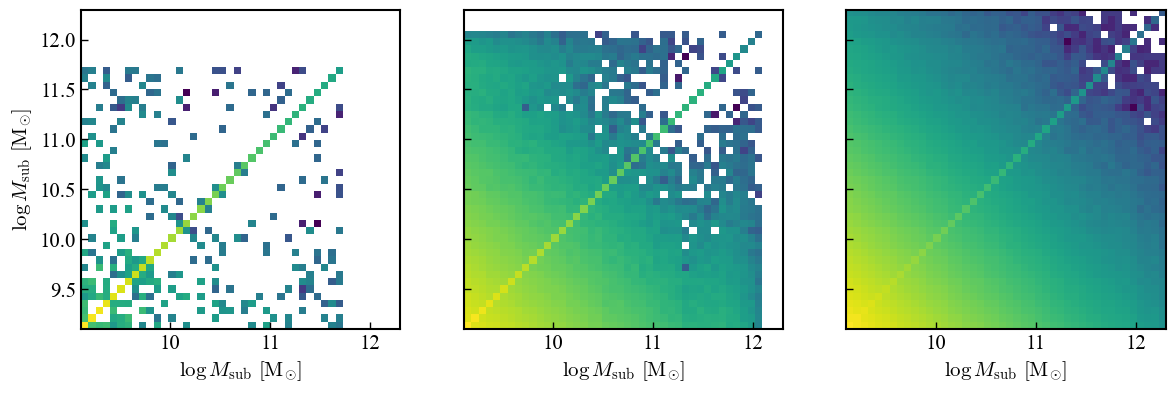

In [10]:
fig, axs=plt.subplots(ncols=3, sharey=True, figsize=(14,14))

axs[0].imshow(np.log10(C_s0), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap="viridis", origin="lower")
axs[1].imshow(np.log10(C_s15), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap="viridis", origin="lower")
axs[2].imshow(np.log10(C_s30), extent=[mass_bins.min(), mass_bins.max(), mass_bins.min(), mass_bins.max()], cmap="viridis", origin="lower")

# axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable="box")
# axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable="box")
# axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable="box")

axs[0].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[1].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[2].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
plt.show()